In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [16]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Pclass'>

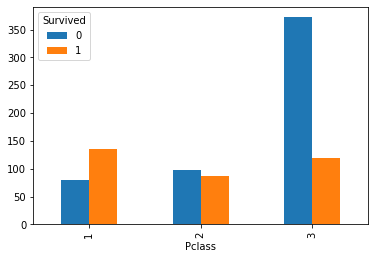

In [17]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind = 'bar')

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

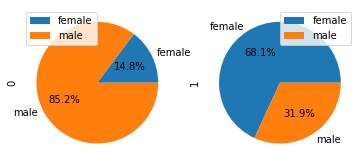

In [18]:
y = pd.crosstab(df['Sex'],df['Survived'])
y.plot.pie(subplots = True, autopct = '%0.1f%%')

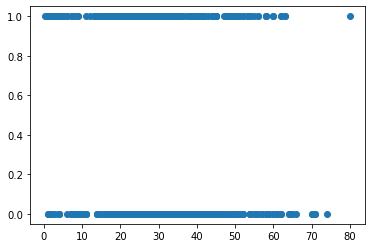

In [19]:
plt.scatter(df['Age'],df['Survived'])

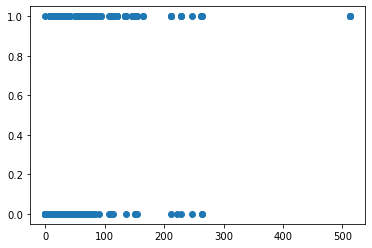

In [20]:
plt.scatter(df['Fare'],df['Survived'])

In [21]:
inpu = df[['Age','Sex','Pclass','Fare']]
inpu

,Age,Sex,Pclass,Fare
0,22.0,male,3,7.2500
1,38.0,female,1,71.2833
2,26.0,female,3,7.9250
3,35.0,female,1,53.1000
4,35.0,male,3,8.0500
...,...,...,...,...
886,27.0,male,2,13.0000
887,19.0,female,1,30.0000
888,NaN,female,3,23.4500
889,26.0,male,1,30.0000


In [22]:
inpu.isna().value_counts()

Age    Sex    Pclass  Fare 
False  False  False   False    714
True   False  False   False    177
dtype: int64

In [23]:
inpu['Age']=inpu['Age'].fillna(inpu.Age.mean())

inpu

<ipython-input-23-09c7c5471242>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpu['Age']=inpu['Age'].fillna(inpu.Age.mean())


,Age,Sex,Pclass,Fare
0,22.000000,male,3,7.2500
1,38.000000,female,1,71.2833
2,26.000000,female,3,7.9250
3,35.000000,female,1,53.1000
4,35.000000,male,3,8.0500
...,...,...,...,...
886,27.000000,male,2,13.0000
887,19.000000,female,1,30.0000
888,29.699118,female,3,23.4500
889,26.000000,male,1,30.0000


In [24]:
se = LabelEncoder()
inpu['nSex'] = se.fit_transform(inpu['Sex'])
inpu =inpu.drop('Sex',axis='columns')
inpu
                                

<ipython-input-24-bb62866fd110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpu['nSex'] = se.fit_transform(inpu['Sex'])


,Age,Pclass,Fare,nSex
0,22.000000,3,7.2500,1
1,38.000000,1,71.2833,0
2,26.000000,3,7.9250,0
3,35.000000,1,53.1000,0
4,35.000000,3,8.0500,1
...,...,...,...,...
886,27.000000,2,13.0000,1
887,19.000000,1,30.0000,0
888,29.699118,3,23.4500,0
889,26.000000,1,30.0000,1


In [27]:
inpu = inpu[['Age','Fare','nSex','Pclass']].astype(int)
inpu

,Age,Fare,nSex,Pclass
0,22,7,1,3
1,38,71,0,1
2,26,7,0,3
3,35,53,0,1
4,35,8,1,3
...,...,...,...,...
886,27,13,1,2
887,19,30,0,1
888,29,23,0,3
889,26,30,1,1


In [28]:

out = df['Survived']
out

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
inpu_train , inpu_test , out_train , out_test = train_test_split(inpu,out,train_size=0.8)

In [34]:
treee = tree.DecisionTreeClassifier()
treee.fit(inpu_train,out_train)

DecisionTreeClassifier()

In [35]:
treee.score(inpu_train,out_train)

0.9508426966292135

In [49]:
pre =treee.predict(inpu_test)
pre

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [47]:
treee.score(inpu_test,out_test)

0.8100558659217877

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(out_test, pre)
cm

array([[107,  11],
       [ 23,  38]], dtype=int64)

<IPython.core.display.Javascript object>


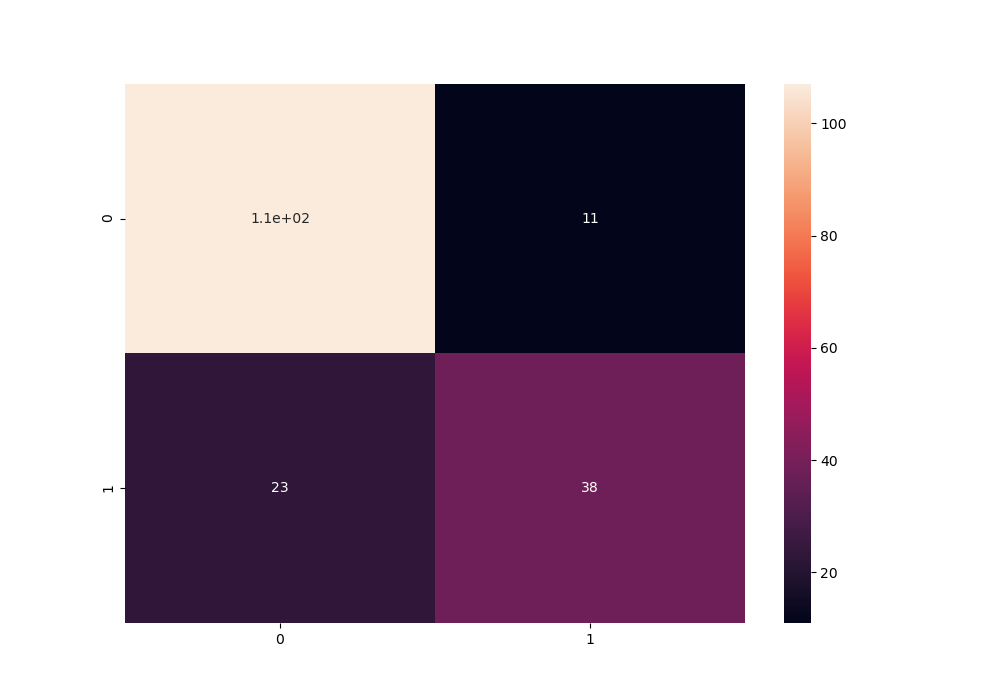

<AxesSubplot:>

In [52]:
%matplotlib notebook
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)